In [79]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn . datasets import fetch_california_housing
housing = fetch_california_housing ( as_frame = False )

Nombre atributos: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Numero de observaciones:  20640


(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

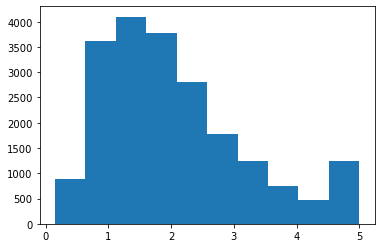

In [80]:
##ITEM 1
nombres = housing.feature_names # ndarray con todos los features
x = housing.data
y = housing.target
print("Nombre atributos:", nombres)
print("Numero de observaciones: ", len(y))
plt.hist(y)

In [81]:
## ITEM 2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
regre = LinearRegression()
regre.fit(X_train, y_train)
y_train_predict = regre.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_predict)
print('el error de entrenamiento es MSE = ', mse_train)

y_test_predict = regre.predict(X_test)
mse_train_test = mean_squared_error(y_test, y_test_predict)
print('el error de test es MSE = ', mse_train_test)

el error de entrenamiento es MSE =  0.5145924626720385
el error de test es MSE =  0.5435945247974568


In [82]:
## ITEM 3
r2train = r2_score(y_train, y_train_predict)
r2test = r2_score(y_test, y_test_predict)
print("R2 Training: ", r2train)
print("R2 Test: ", r2test)

R2 Training:  0.612130026035787
R2 Test:  0.5939400468776981


In [83]:
## ITEM 4
y2 = housing.target*2
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y2, test_size=0.40, random_state=42)
regre = LinearRegression()
regre.fit(X_train2, y_train2)
y_train_predict2 = regre.predict(X_train2)
mse_train2 = mean_squared_error(y_train2, y_train_predict2)
print('el error de entrenamiento es MSE 2= ', mse_train2)

y_test_predict2 = regre.predict(X_test2)
mse_train_test2 = mean_squared_error(y_test2, y_test_predict2)
print('el error de test es MSE 2 = ', mse_train_test2)

r2train2 = r2_score(y_train2, y_train_predict2)
r2test2 = r2_score(y_test2, y_test_predict2)
print("R2 Training 2: ", r2train2)
print("R2 Test 2: ", r2test2)

el error de entrenamiento es MSE 2=  2.058369850688154
el error de test es MSE 2 =  2.1743780991898274
R2 Training 2:  0.612130026035787
R2 Test 2:  0.5939400468776981


In [112]:
## ITEM 5
for i in range(8):
    x_unico = x[:,i]
    x_unico = np.reshape(x_unico, (len(x_unico), 1))
    X_train_unico, X_test_unico, y_train_unico, y_test_unico = train_test_split(x_unico, y, test_size=0.40, random_state=42)
    regre_unico = LinearRegression()
    regre_unico.fit(X_train_unico, y_train_unico)

    y_test_predict_unico = regre_unico.predict(X_test_unico)
    mse_train_test_unico = mean_squared_error(y_test_unico, y_test_predict_unico)
    print('el error de test es MSE en', housing.feature_names[i], ":",mse_train_test_unico)

print("---")
print('el error de test es MSE ejercicio 2 = ', mse_train_test)

# MEJOR SELECCIÓN
x_mejor = x[:,0]
x_mejor = np.reshape(x_mejor, (len(x_mejor), 1))
X_train_mejor, X_test_mejor, y_train_mejor, y_test_mejor = train_test_split(x_mejor, y, test_size=0.40, random_state=42)
regre_mejor = LinearRegression()
regre_mejor.fit(X_train_mejor, y_train_mejor)
y_test_predict_mejor = regre_mejor.predict(X_test_mejor)
mse_train_test_mejor = mean_squared_error(y_test_mejor, y_test_predict_mejor)

el error de test es MSE en MedInc : 0.7086543961721935
el error de test es MSE en HouseAge : 1.3237640951820207
el error de test es MSE en AveRooms : 1.3081405365505503
el error de test es MSE en AveBedrms : 1.3361745311767579
el error de test es MSE en Population : 1.3381420490846825
el error de test es MSE en AveOccup : 1.3380153713359506
el error de test es MSE en Latitude : 1.3099639075017702
el error de test es MSE en Longitude : 1.3366717786888598
---
el error de test es MSE ejercicio 2 =  0.5435945247974568


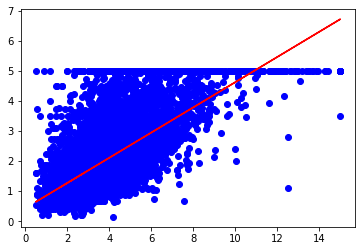

In [115]:
### ITEM 6
plt.scatter(X_test_mejor, y_test_mejor, color="blue")
plt.plot(X_test_mejor, y_test_predict_mejor, color="red")